In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import pickle
from matplotlib import cm
from datetime import datetime

In [2]:
# These commands choose fonts that are editable in svg format
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# colors
dblue = '#1f77b4'
red3 = ['#fee0d2','#fc9272','#de2d26']
# oranges from ColorBrewer https://colorbrewer2.org/#type=sequential&scheme=PuBu&n=5
cols=['#feedde','#fdbe85','#fd8d3c','#e6550d','#a63603']
blue5=['#f1eef6','#bdc9e1','#bdc9e1','#2b8cbe','#045a8d']
green5=['#edf8e9','#bae4b3','#74c476','#31a354','#006d2c']
purple5 = ['#f2f0f7','#cbc9e2','#9e9ac8','#756bb1','#54278f']
ored3 = ['#fee8c8','#fdbb84','#e34a33']

# This is the colormap made in SurferClr2Cmap.ipynb from NorthCore_ElevationShader_v2.clr
fp = open('cmap_ncb.pkl', 'rb')
cmap_ncb = pickle.load(fp)
fp.close()

# This makes NaN gray
tcmap=cmap_ncb
tcmap.set_bad(color='darkgray')

# tcmapw=cmap_ncb
# tcmapw.set_bad(color='white')

# This is the difference color map
dcmap = cm.seismic.copy()
dcmap.set_bad(color='darkgray')

# This is the difference color map
# dcmapw = cm.seismic.copy()
# dcmapw.set_bad(color='white')

ygbmap = cm.YlGnBu_r.copy()
ygbmap.set_bad(color='darkgray')

prmap = cm.PuRd.copy()
prmap.set_bad(color='darkgray')

In [3]:
fig_dir = '/vortexfs1/home/csherwood/proj/dorian/'

In [7]:
### load the grid files
url = '/vortexfs1/home/csherwood/proj/dorian/NCoreBanks_sub9_chrisbathy.nc'
ds_grid = xr.open_dataset(url)
ds_grid

<xarray.Dataset>
Dimensions:    (one: 1, bath: 1, eta_rho: 1017, xi_rho: 1317, eta_psi: 1016,
                xi_psi: 1316, eta_u: 1017, xi_u: 1316, eta_v: 1016, xi_v: 1317)
Dimensions without coordinates: one, bath, eta_rho, xi_rho, eta_psi, xi_psi,
                                eta_u, xi_u, eta_v, xi_v
Data variables: (12/34)
    xl         (one) float64 ...
    el         (one) float64 ...
    JPRJ       |S2 ...
    spherical  (one) |S1 ...
    depthmin   (one) int16 ...
    depthmax   (one) int16 ...
    ...         ...
    lon_v      (eta_v, xi_v) float64 ...
    mask_rho   (eta_rho, xi_rho) float64 ...
    mask_u     (eta_u, xi_u) float64 ...
    mask_v     (eta_v, xi_v) float64 ...
    mask_psi   (eta_psi, xi_psi) float64 ...
    angle      (eta_rho, xi_rho) float64 ...
Attributes:
    type:     ROMS GRID file
    gridid:   theGridTitle
    history:  Created by create_roms_netcdf_grid_file, on 02-Sep-2021 12:34:22
    title:    ROMS Application

In [9]:
### load the model run
url='http://geoport.whoi.edu/thredds/dodsC/vortexfs1/usgs/Projects/dorian/dorian_032/dorian_his.ncml'

ds_mod = xr.open_dataset(url)
ds_mod

<xarray.Dataset>
Dimensions:                 (tracer: 2, NST: 1, s_rho: 5, s_w: 6,
                             eta_rho: 1017, xi_rho: 1317, eta_u: 1017,
                             xi_u: 1316, eta_v: 1016, xi_v: 1317,
                             eta_psi: 1016, xi_psi: 1316, ocean_time: 24,
                             NVEG: 3, Nbed: 1)
Coordinates:
  * s_rho                   (s_rho) float64 -0.9 -0.7 -0.5 -0.3 -0.1
  * s_w                     (s_w) float64 -1.0 -0.8 -0.6 -0.4 -0.2 0.0
    lon_rho                 (eta_rho, xi_rho) float64 ...
    lat_rho                 (eta_rho, xi_rho) float64 ...
    lon_u                   (eta_u, xi_u) float64 ...
    lat_u                   (eta_u, xi_u) float64 ...
    lon_v                   (eta_v, xi_v) float64 ...
    lat_v                   (eta_v, xi_v) float64 ...
    lon_psi                 (eta_psi, xi_psi) float64 ...
    lat_psi                 (eta_psi, xi_psi) float64 ...
  * ocean_time              (ocean_time) datetime64[ns] 2019-09-06T11:14:59.9...
Dimensions without coordinates: tracer, NST, eta_rho, xi_rho, eta_u, xi_u,
                                eta_v, xi_v, eta_psi, xi_psi, NVEG, Nbed
Data variables: (12/173)
    ntimes                  int32 ...
    ndtfast                 int32 ...
    dt                      float64 ...
    dtfast                  float64 ...
    dstart                  datetime64[ns] ...
    nHIS                    int32 ...
    ...                      ...
    Dwave                   (ocean_time, eta_rho, xi_rho) float32 ...
    Pwave_top               (ocean_time, eta_rho, xi_rho) float32 ...
    Dissip_fric             (ocean_time, eta_rho, xi_rho) float32 ...
    Dissip_break            (ocean_time, eta_rho, xi_rho) float32 ...
    Dissip_wcap             (ocean_time, eta_rho, xi_rho) float32 ...
    Dissip_roller           (ocean_time, eta_rho, xi_rho) float32 ...
Attributes: (12/33)
    file:                      ./Output/Dorian_NCB_his_00016.nc
    format:                    netCDF-3 64bit offset file
    Conventions:               CF-1.4, SGRID-0.3
    type:                      ROMS/TOMS history file
    title:                     Hurricane Dorian North Core Banks
    var_info:                  ./ROMS/External/varinfo.dat
    ...                        ...
    tiling:                    021x012
    history:                   ROMS/TOMS, Version 3.9, Monday - May 9, 2022 -...
    ana_file:                  ROMS/Functionals/ana_btflux.h, ROMS/Functional...
    CPP_options:               COREBANKS, ANA_BPFLUX, ANA_BSFLUX, ANA_BTFLUX,...
    EXTRA_DIMENSION.N:         5
    EXTRA_DIMENSION.boundary:  4

In [6]:
# load the pre- post- observations
url = '/vortexfs1/home/csherwood/proj/dorian/NCoreBanks_sub9_pre_post_veg.nc'
ds_obs = xr.open_dataset(url)
ds_obs

<xarray.Dataset>
Dimensions:           (one: 1, bath: 1, eta_rho: 1017, xi_rho: 1317,
                       eta_psi: 1016, xi_psi: 1316, eta_u: 1017, xi_u: 1316,
                       eta_v: 1016, xi_v: 1317)
Dimensions without coordinates: one, bath, eta_rho, xi_rho, eta_psi, xi_psi,
                                eta_u, xi_u, eta_v, xi_v
Data variables: (12/37)
    xl                (one) float64 ...
    el                (one) float64 ...
    JPRJ              |S2 ...
    spherical         (one) |S1 ...
    depthmin          (one) int16 ...
    depthmax          (one) int16 ...
    ...                ...
    mask_v            (eta_v, xi_v) float64 ...
    mask_psi          (eta_psi, xi_psi) float64 ...
    angle             (eta_rho, xi_rho) float64 ...
    canopy_height     (eta_rho, xi_rho) float64 ...
    pre_Dorian_elev   (eta_rho, xi_rho) float64 ...
    post_Dorian_elev  (eta_rho, xi_rho) float64 ...
Attributes:
    type:     ROMS GRID file
    gridid:   theGridTitle
    history:  Created by create_roms_netcdf_grid_file, on 02-Sep-2021 12:34:2...
    title:    ROMS Application

In [20]:
# h_pre_mod = -ds_grid.h
h_pre_mod = -ds_mod.bath[0,:,:]
h_pst_mod = -ds_mod.bath[23,:,:]

h_pre_obs = ds_obs.pre_Dorian_elev[:,:]
h_pst_obs = ds_obs.post_Dorian_elev[:,:]

x = ds_grid.xi_rho
y = ds_grid.eta_rho

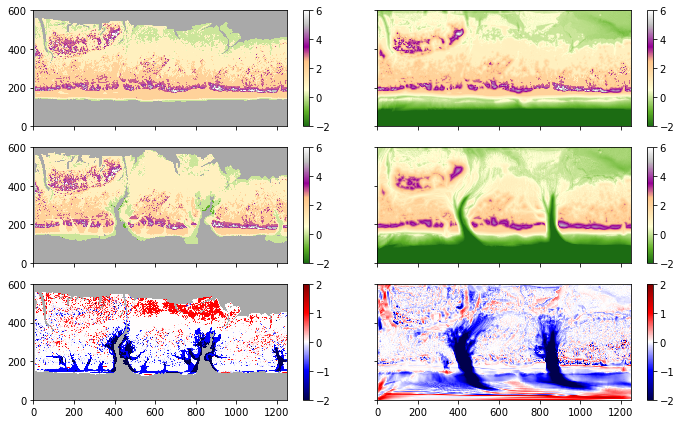

In [25]:
fig, ax = plt.subplots(3,2, figsize=(10,6),sharex=True,sharey=True)
fig.tight_layout()
map00 = ax[0,0].pcolormesh(x,y,h_pre_obs, cmap=tcmap, vmin = -2., vmax = 6)
ax[0,0].set_ylim([0,600])
ax[0,0].set_xlim([0,1250])
fig.colorbar(map00, ax=ax[0,0])
#ax[0,0].set_xticklabels([])

map10 = ax[1,0].pcolormesh(x,y,h_pst_obs, cmap=tcmap, vmin = -2., vmax = 6)
ax[1,0].set_ylim([0,600])
ax[1,0].set_xlim([0,1250])
fig.colorbar(map10, ax=ax[1,0])
#ax[1,0].set_xticklabels([])

map20 = ax[2,0].pcolormesh(x,y,(h_pst_obs-h_pre_obs), cmap=dcmap, vmin=-2, vmax=2 )
ax[2,0].set_ylim([0,600])
ax[2,0].set_xlim([0,1250])
fig.colorbar(map20, ax=ax[2,0])

map01 = ax[0,1].pcolormesh(x,y,h_pre_mod, cmap=tcmap, vmin = -2., vmax = 6)
ax[0,1].set_ylim([0,600])
ax[0,1].set_xlim([0,1250])
fig.colorbar(map01, ax=ax[0,1])
#ax[0,1].set_xticklabels([])

map11 = ax[1,1].pcolormesh(x,y,h_pst_mod, cmap=tcmap, vmin = -2., vmax = 6)
ax[1,1].set_ylim([0,600])
ax[1,1].set_xlim([0,1250])
fig.colorbar(map11, ax=ax[1,1])
#ax[1,1].set_xticklabels([])

map21 = ax[2,1].pcolormesh(x,y,(h_pst_mod-h_pre_mod), cmap=dcmap, vmin=-2, vmax=2 )
ax[2,1].set_ylim([0,600])
ax[2,1].set_xlim([0,1250])
_ = fig.colorbar(map2, ax=ax[2,1])

plt.savefig(fig_dir+'mod_obs_pre_post_diff.png',dpi=200)

In [60]:
# volume change
dx = 1./0.667
dy = 1./0.667

# replace nans in observed with fill_val
fill_val = -1.5
h_pre_obs_fill = np.nan_to_num(h_pre_obs, copy=True, nan=fill_val, posinf=fill_val, neginf=fill_val) 
h_pst_obs_fill = np.nan_to_num(h_pst_obs, copy=True, nan=fill_val, posinf=fill_val, neginf=fill_val) 


del_obs = (h_pst_obs - h_pre_obs)*dx*dy
del_obs_fill = (h_pst_obs_fill - h_pre_obs_fill)*dx*dy
del_mod = (h_pst_mod - h_pre_mod)*dx*dy

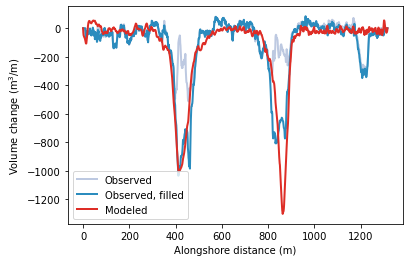

In [64]:
dv_obs_along = np.nansum(del_obs[140:500,:],0)
dv_obs_along_fill = np.nansum(del_obs_fill[140:500,:],0)
dv_mod_along = np.nansum(del_mod[140:500,:],0)

plt.plot(x,dv_obs_along/dx,'-',linewidth=2,label='Observed',c=blue5[1])
plt.plot(x,dv_obs_along_fill/dx,'-',linewidth=2,label='Observed, filled',c=blue5[3])
plt.plot(x,dv_mod_along/dx,linewidth=2,label='Modeled', c=red3[2])
plt.xlabel('Alongshore distance (m)')
plt.ylabel('Volume change (m$^3$/m)')
_ = plt.legend()

In [66]:
print('Average mod.: ',np.mean(dv_mod_along/dx))
print('Average mod.: ',np.mean(dv_obs_along/dx))

Average mod.:  -127.973694
Average mod.:  -61.124634483407746


In [36]:
x.shape

(1317,)